In [71]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from collections import defaultdict

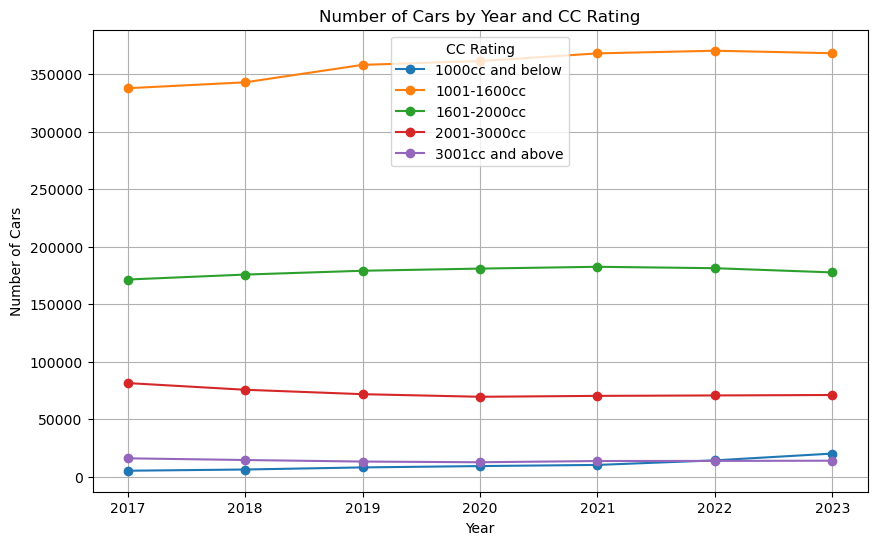

In [72]:
df = pd.read_csv('CC.csv')

df_filtered_vehicle_2017_2023 = df[(df['year'] >= 2017) & (df['year'] <= 2023)]
grouped_df = df_filtered_vehicle_2017_2023.groupby(['year', 'cc_rating'])['number'].sum().unstack()

# 创建一个折线图
plt.figure(figsize=(10, 6))

# 为每个 cc_rating 绘制一条折线
for cc in grouped_df.columns:
    plt.plot(grouped_df.index, grouped_df[cc], marker='o', label=cc)

plt.title('Number of Cars by Year and CC Rating')
plt.xlabel('Year')
plt.ylabel('Number of Cars')
plt.legend(title='CC Rating')
plt.grid(True)

plt.show()

In [73]:
df_filtered_vehicle_2017_2023['above_2000cc'] = df_filtered_vehicle_2017_2023['cc_rating'].apply(
    lambda x: '2001-3000cc' in x or '3001cc and above' in x or 'above' in x)

yearly_total_vehicles_and_large_vehicle = df_filtered_vehicle_2017_2023.groupby('year').agg(
    total_vehicles=('number', 'sum'),
    total_above_2000cc=('number', lambda x: x[df_filtered_vehicle_2017_2023['above_2000cc']].sum())

).reset_index()
yearly_total_vehicles_and_large_vehicle['large_vehicle_ratio'] = yearly_total_vehicles_and_large_vehicle['total_above_2000cc'] / yearly_total_vehicles_and_large_vehicle['total_vehicles']

yearly_total_vehicles_and_large_vehicle.head(10)

/var/folders/02/l3bygprn2h9b8ybp168cbm5r0000gn/T/ipykernel_95839/3581279916.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_vehicle_2017_2023['above_2000cc'] = df_filtered_vehicle_2017_2023['cc_rating'].apply(


,year,total_vehicles,total_above_2000cc,large_vehicle_ratio
0,2017,612256,97687,0.159553
1,2018,615452,90406,0.146894
2,2019,630596,85242,0.135177
3,2020,634042,82375,0.129920
4,2021,645150,84227,0.130554
5,2022,650667,84700,0.130174
6,2023,651302,85254,0.130898


In [74]:
# # API 基础 URL
# base_url = "https://api-open.data.gov.sg/v2/real-time/api/psi"
# 
# # 初始化日期范围
# start_date = datetime(2017, 1, 1)
# end_date = datetime(2023, 12, 31)
# 
# # 初始化一个字典来存储日平均值数据
# daily_avg_data = defaultdict(list)
# 
# # 循环逐日请求数据
# current_date = start_date
# while current_date <= end_date:
#     # 格式化日期为 API 所需格式
#     date_str = current_date.strftime('%Y-%m-%d')
#     
#     # 请求 API 数据
#     response = requests.get(base_url, params={'date': date_str})
#     
#     # 检查响应状态
#     if response.status_code == 200:
#         data = response.json()
#         
#         # 处理每个时间点的数据
#         for item in data['data']['items']:
#             timestamp = item['timestamp']
#             readings = item['readings']
#             
#             # 遍历每个污染物及其区域数据
#             for pollutant, regions in readings.items():
#                 for region, value in regions.items():
#                     daily_avg_data['date'].append(timestamp[:10])  # 仅保留日期部分
#                     daily_avg_data['region'].append(region)
#                     daily_avg_data['pollutant'].append(pollutant)
#                     daily_avg_data['value'].append(value)
#     else:
#         print(f"Failed to retrieve data for {date_str}")
#     
#     # 移动到下一天
#     current_date += timedelta(days=1)
# 
# # 将数据转换为 DataFrame
# df = pd.DataFrame(daily_avg_data)
# 
# # 按照日期、区域和污染物进行聚合，计算日平均值
# daily_avg_df = df.groupby(['date', 'region', 'pollutant']).mean().reset_index()

In [75]:
# save_path = '/Users/edwardxie/Desktop/IS5126 HAA/Group_Project/GroupProject/data/daily_avg_psi_2017_2023.csv'
# 
# # 保存结果为 CSV 文件
# daily_avg_df.to_csv(save_path, index=False)
# 
# # 显示处理后的数据
# daily_avg_df.head(10)

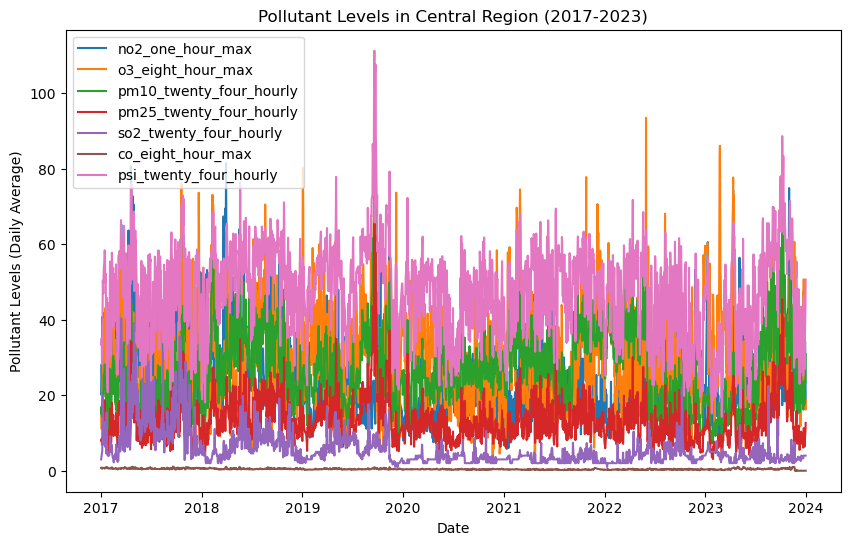

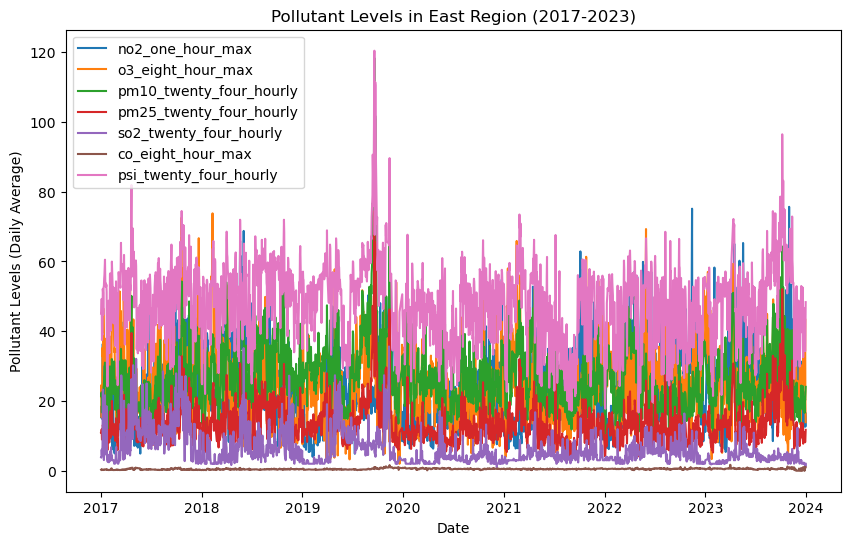

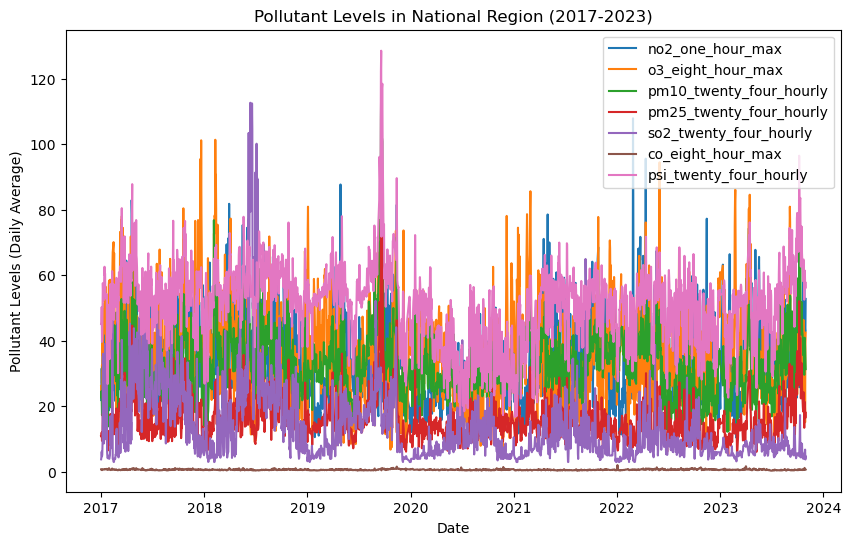

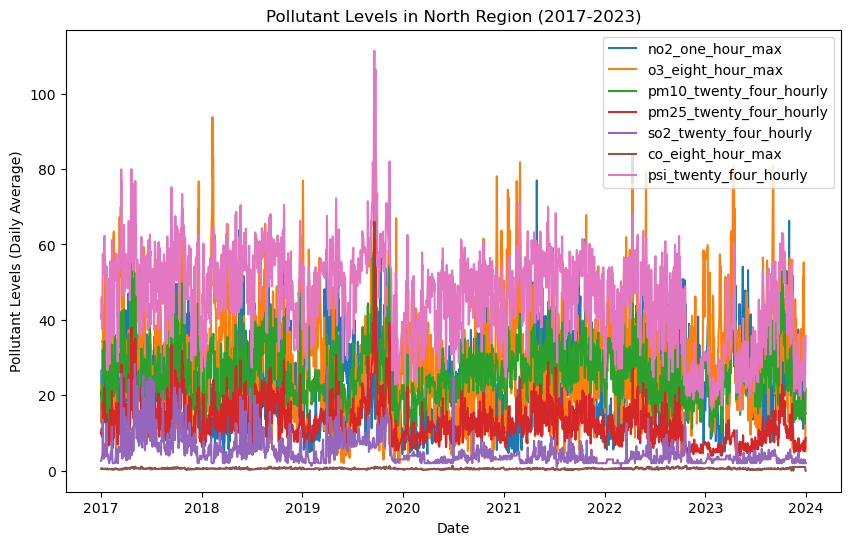

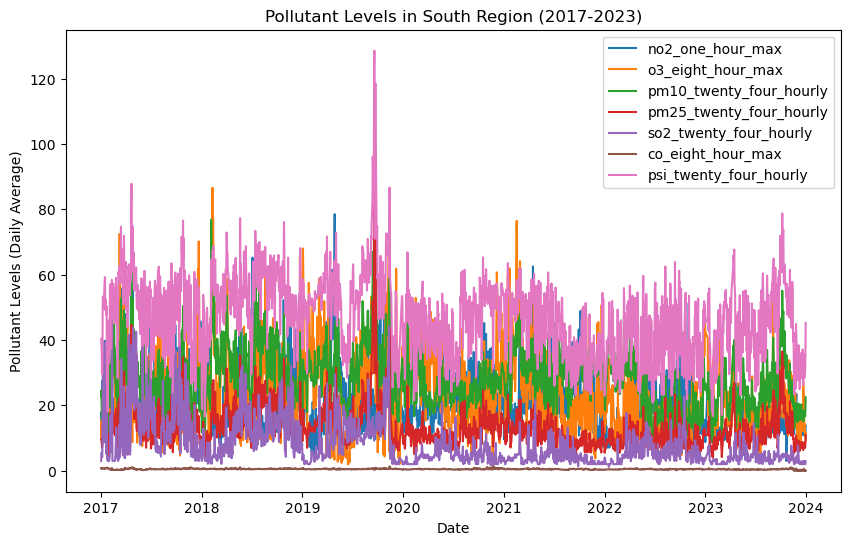

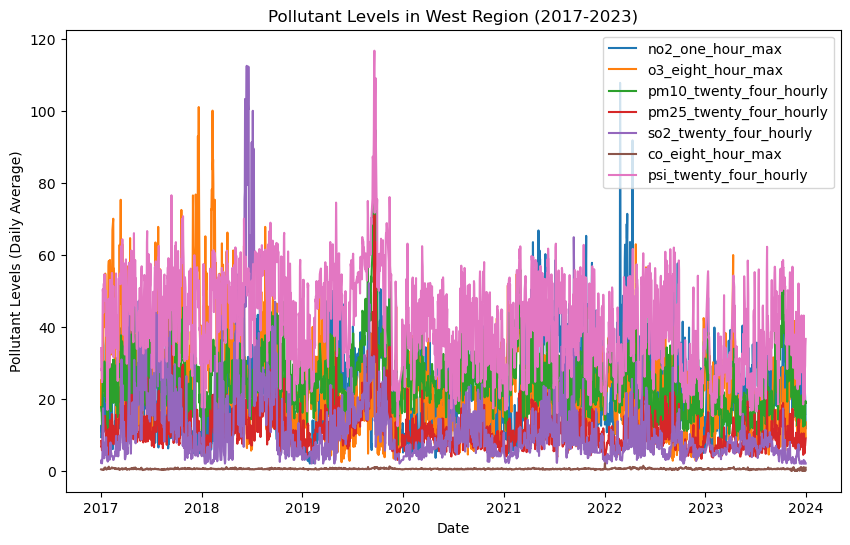

In [76]:
daily_avg_df = pd.read_csv('daily_avg_psi_2017_2023.csv')

# 将日期列转换为 datetime 格式
daily_avg_df['date'] = pd.to_datetime(daily_avg_df['date'])

# 过滤出需要的污染物数据
pollutants_of_interest = ['no2_one_hour_max', 'o3_eight_hour_max', 'pm10_twenty_four_hourly', 'pm25_twenty_four_hourly', 'so2_twenty_four_hourly', 'co_eight_hour_max', 'psi_twenty_four_hourly']
df_filtered_pollutant = daily_avg_df[daily_avg_df['pollutant'].isin(pollutants_of_interest)]

# 获取所有的地区
regions = daily_avg_df['region'].unique()

# 为每个区域绘制折线图
for region in regions:
    plt.figure(figsize=(10, 6))
    
    # 筛选出该区域的数据
    region_data = df_filtered_pollutant[df_filtered_pollutant['region'] == region]
    
    # 为每个污染物绘制一条折线
    for pollutant in pollutants_of_interest:
        pollutant_data = region_data[region_data['pollutant'] == pollutant]
        plt.plot(pollutant_data['date'], pollutant_data['value'], label=pollutant)
    
    # 设置图表标题和标签
    plt.title(f'Pollutant Levels in {region.capitalize()} Region (2017-2023)')
    plt.xlabel('Date')
    plt.ylabel('Pollutant Levels (Daily Average)')
    plt.legend()
    
    # 显示图表
    plt.show()

In [77]:
# 添加年份列
daily_avg_df['year'] = daily_avg_df['date'].dt.year

# 过滤出需要的污染物数据（假设我们只关心某些污染物）
pollutants_of_interest = ['no2_one_hour_max', 'o3_eight_hour_max', 'pm10_twenty_four_hourly', 'pm25_twenty_four_hourly', 'so2_twenty_four_hourly', 'co_eight_hour_max', 'psi_twenty_four_hourly']
df_filtered_pollutant = daily_avg_df[daily_avg_df['pollutant'].isin(pollutants_of_interest)]

# 按年份、区域和污染物分组，并计算年度平均值
annual_avg_pollutant_df = df_filtered_pollutant.groupby(['year', 'region', 'pollutant']).mean().reset_index()

df_yearly_national_pollutant = annual_avg_pollutant_df[annual_avg_pollutant_df['region'] == 'national']
df_yearly_national_pollutant.drop('date', axis=1, inplace=True)

# Display the first few rows of the filtered data
df_yearly_national_pollutant.head()

/var/folders/02/l3bygprn2h9b8ybp168cbm5r0000gn/T/ipykernel_95839/4151001847.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_yearly_national_pollutant.drop('date', axis=1, inplace=True)


,year,region,pollutant,value
14,2017,national,co_eight_hour_max,0.697020
15,2017,national,no2_one_hour_max,39.269421
16,2017,national,o3_eight_hour_max,39.566390
17,2017,national,pm10_twenty_four_hourly,31.172609
18,2017,national,pm25_twenty_four_hourly,16.883448


In [78]:
merged_data = pd.merge(df_yearly_national_pollutant, yearly_total_vehicles_and_large_vehicle, on='year')
merged_data

,year,region,pollutant,value,total_vehicles,total_above_2000cc,large_vehicle_ratio
0,2017,national,co_eight_hour_max,0.697020,612256,97687,0.159553
1,2017,national,no2_one_hour_max,39.269421,612256,97687,0.159553
2,2017,national,o3_eight_hour_max,39.566390,612256,97687,0.159553
3,2017,national,pm10_twenty_four_hourly,31.172609,612256,97687,0.159553
4,2017,national,pm25_twenty_four_hourly,16.883448,612256,97687,0.159553
5,2017,national,psi_twenty_four_hourly,55.090813,612256,97687,0.159553
6,2017,national,so2_twenty_four_hourly,20.905565,612256,97687,0.159553
7,2018,national,co_eight_hour_max,0.653361,615452,90406,0.146894
8,2018,national,no2_one_hour_max,39.564703,615452,90406,0.146894
9,2018,national,o3_eight_hour_max,36.757087,615452,90406,0.146894


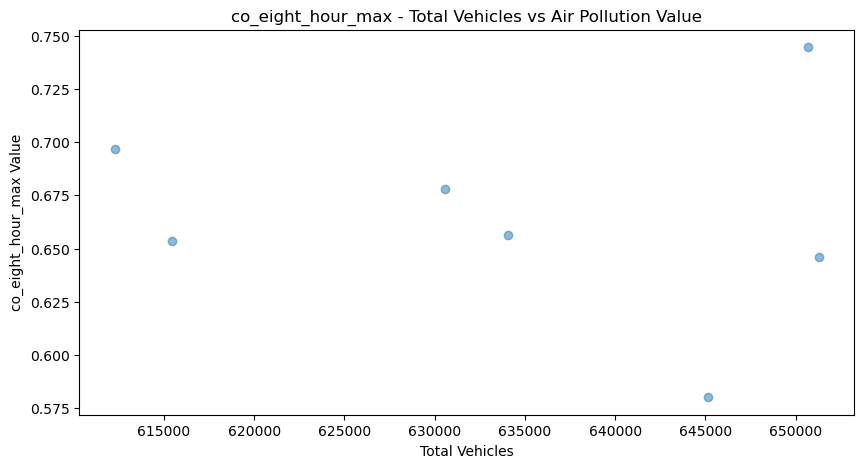

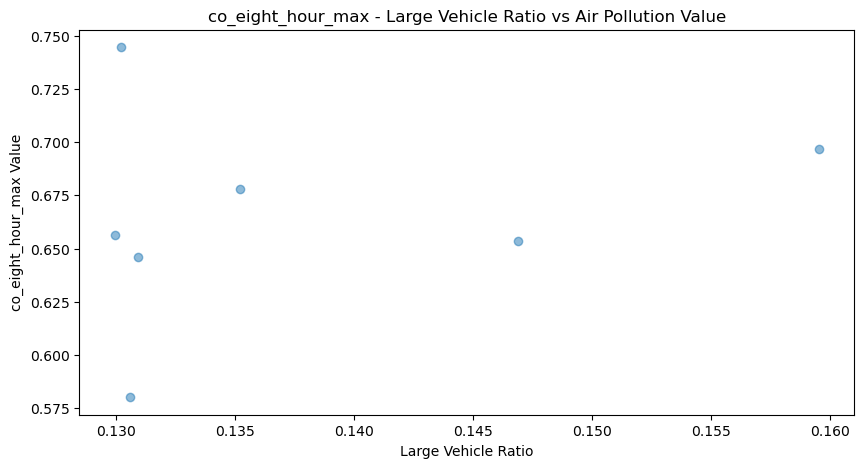

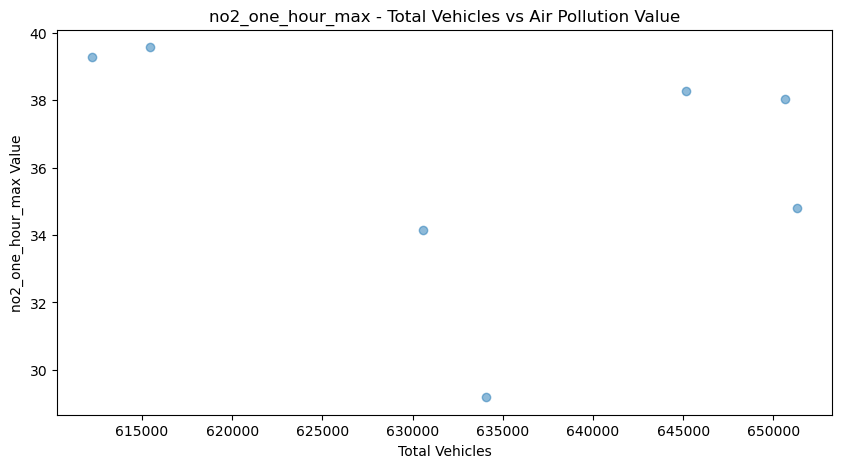

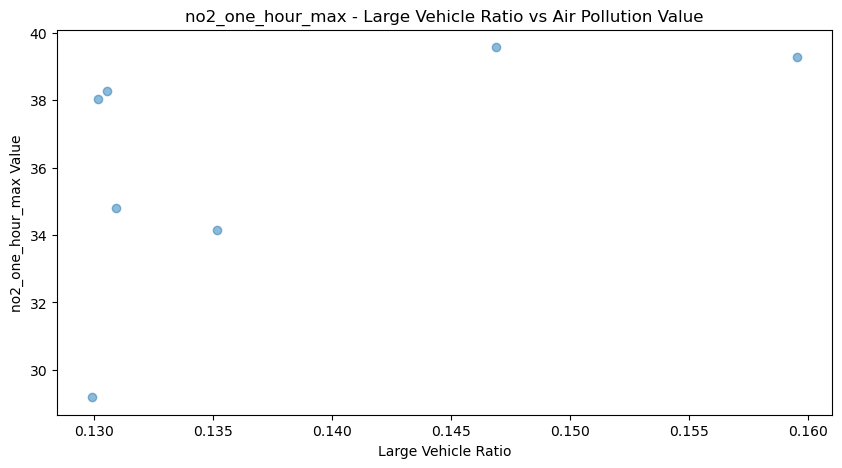

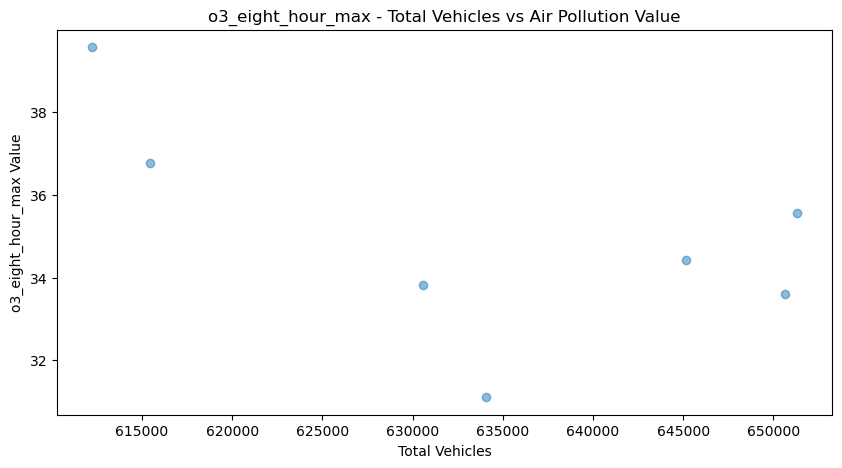

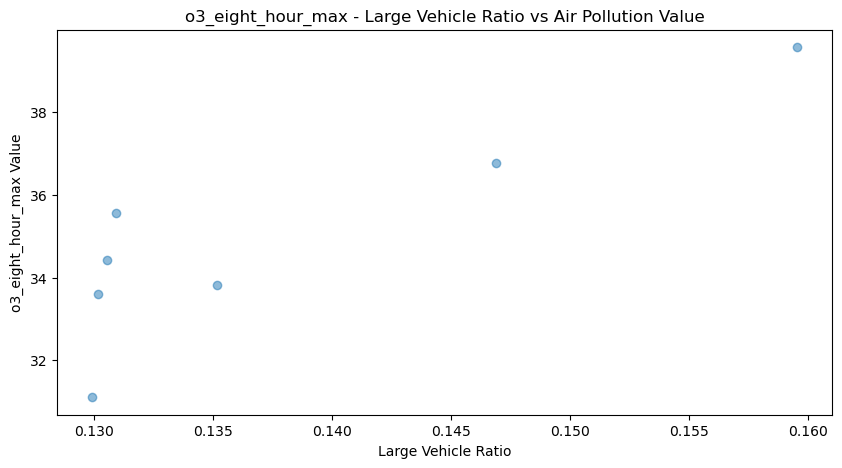

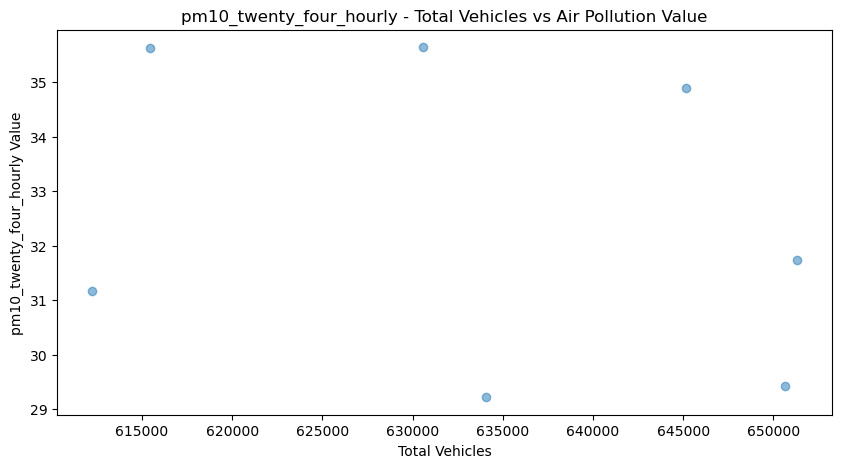

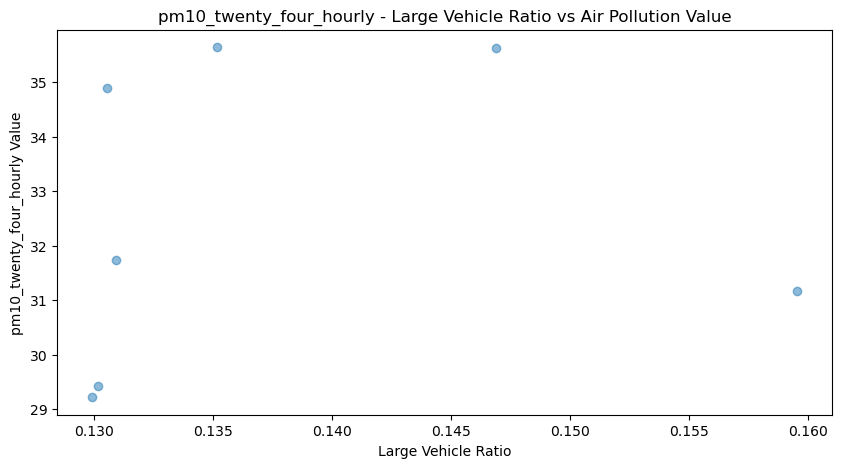

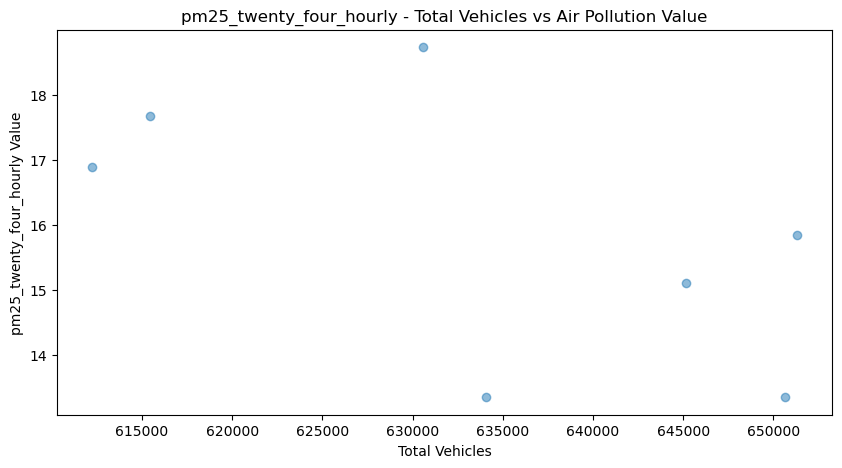

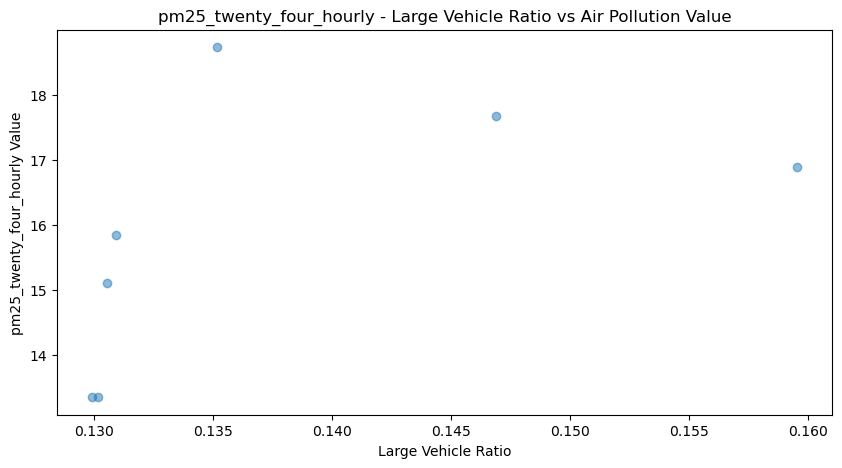

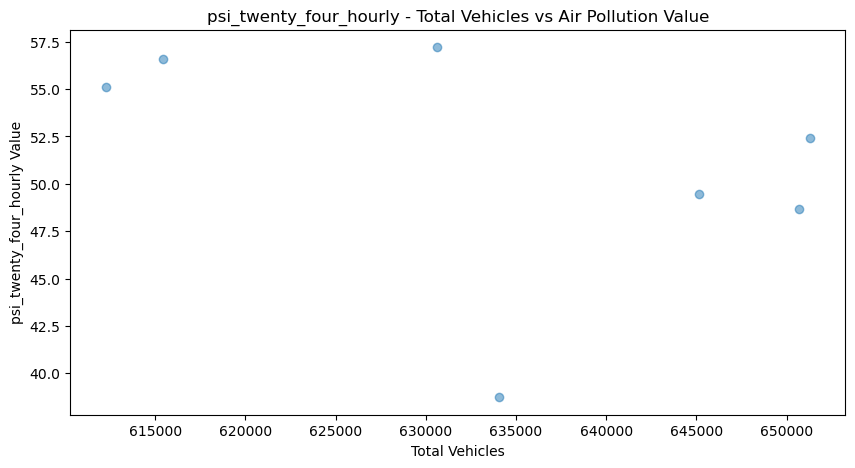

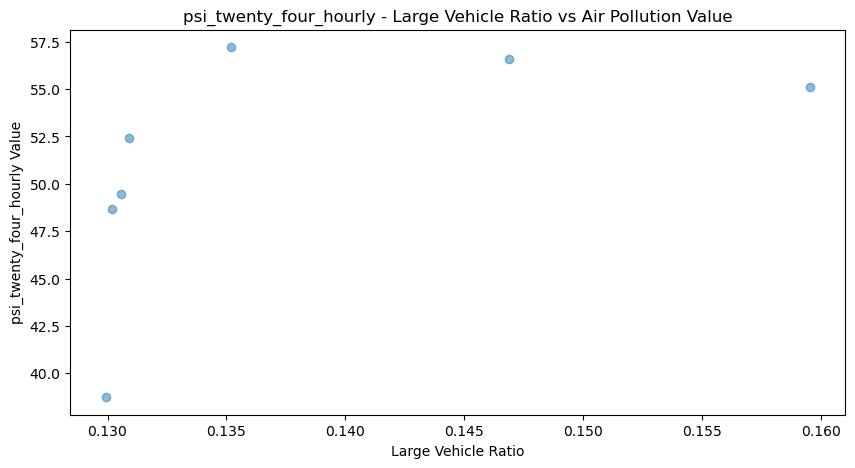

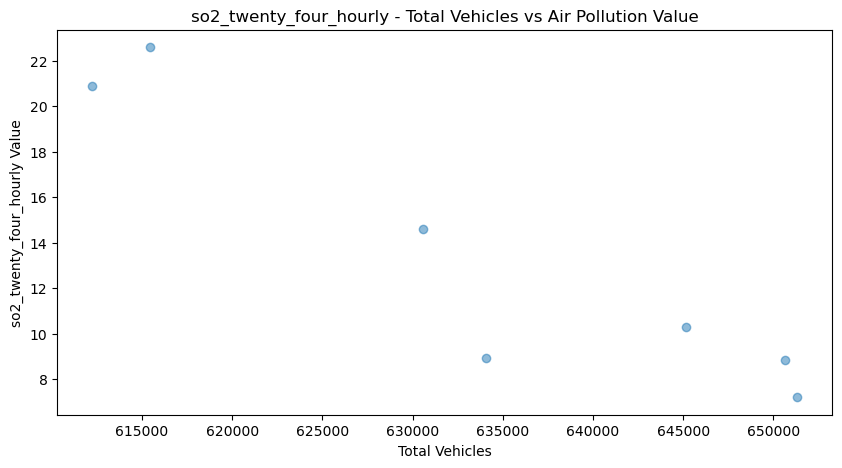

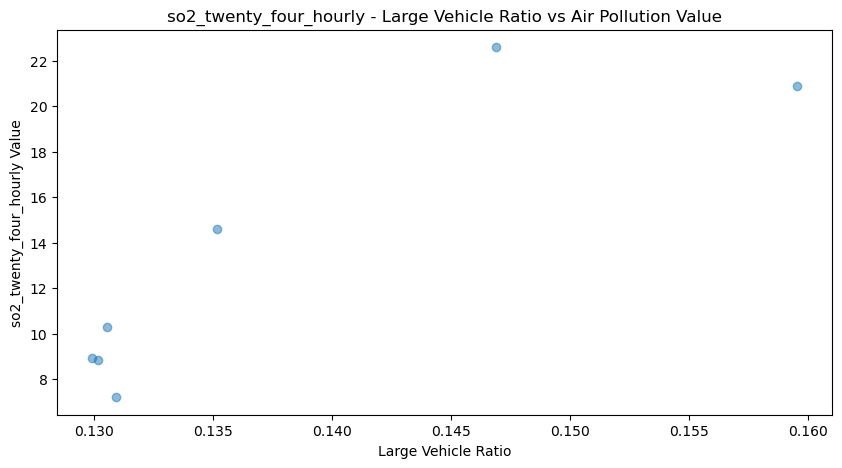

In [79]:
# 获取所有不同的污染物种类
pollutants = merged_data['pollutant'].unique()

# 分别绘制每个污染物的散点图
for pollutant in pollutants:
    plt.figure(figsize=(10, 5))
    
    # 筛选出当前污染物的数据
    pollutant_data = merged_data[merged_data['pollutant'] == pollutant]
    
    # 绘制空气污染 vs 车辆总数的散点图
    plt.scatter(pollutant_data['total_vehicles'], pollutant_data['value'], alpha=0.5)
    plt.title(f'{pollutant} - Total Vehicles vs Air Pollution Value')
    plt.xlabel('Total Vehicles')
    plt.ylabel(f'{pollutant} Value')
    plt.show()
    
    # 绘制空气污染 vs 大排量车辆比例的散点图
    plt.figure(figsize=(10, 5))
    plt.scatter(pollutant_data['large_vehicle_ratio'], pollutant_data['value'], alpha=0.5)
    plt.title(f'{pollutant} - Large Vehicle Ratio vs Air Pollution Value')
    plt.xlabel('Large Vehicle Ratio')
    plt.ylabel(f'{pollutant} Value')
    plt.show()
# 分别计算每个污染物的相关系数

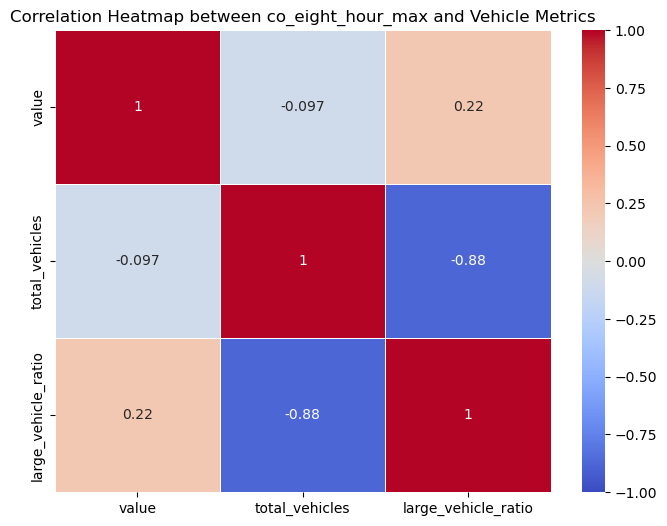

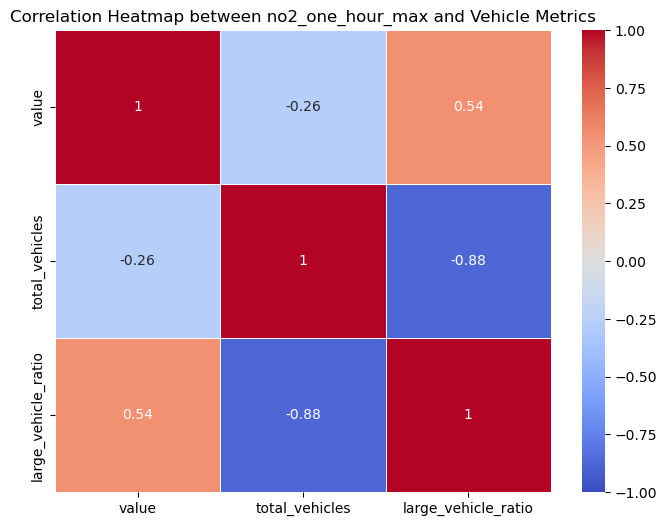

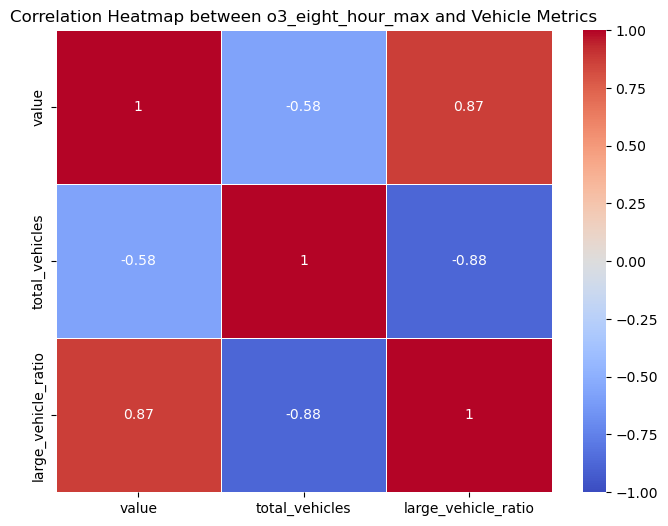

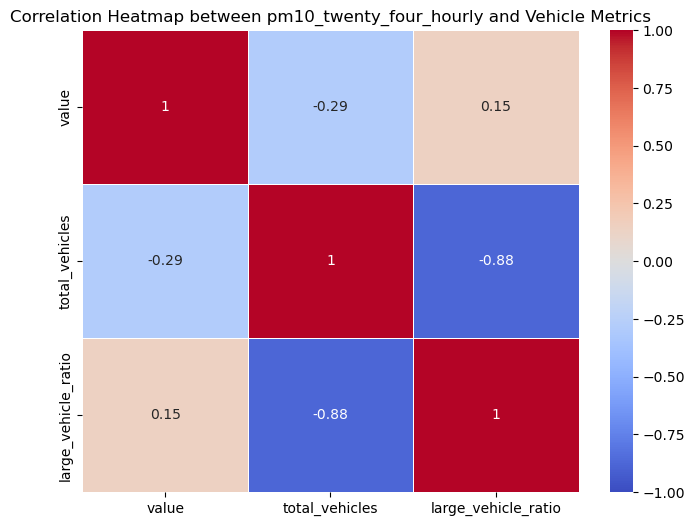

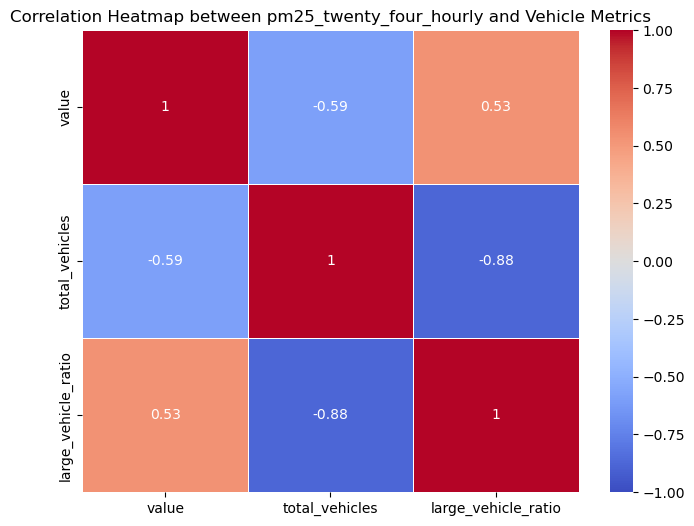

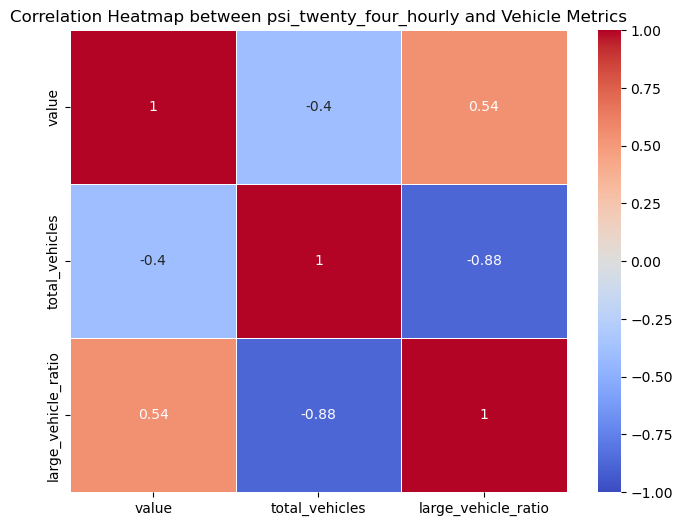

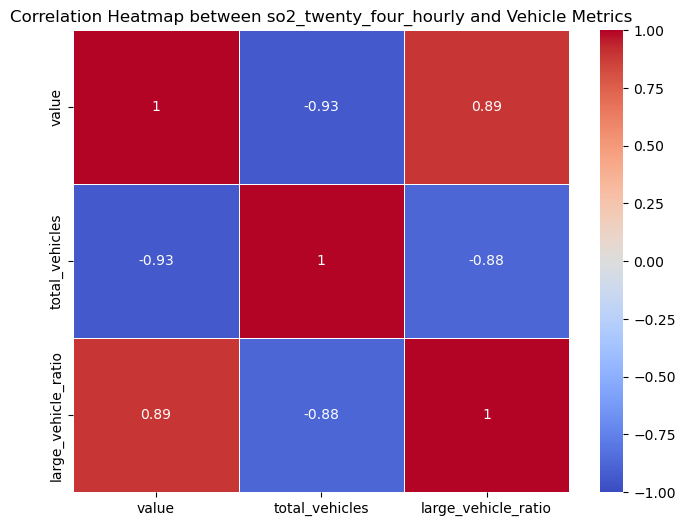

In [80]:
for pollutant in pollutants:
    pollutant_data = merged_data[merged_data['pollutant'] == pollutant]

    correlation_matrix = pollutant_data[['value', 'total_vehicles', 'large_vehicle_ratio']].corr()
    
    # 绘制热力图
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1, linewidths=0.5)
    plt.title(f"Correlation Heatmap between {pollutant} and Vehicle Metrics")
    plt.show()

In [81]:
import statsmodels.api as sm

# 分别为每个污染物建立回归模型
for pollutant in pollutants:
    pollutant_data = merged_data[merged_data['pollutant'] == pollutant]
    
    # 准备自变量和因变量
    X = pollutant_data[['total_vehicles', 'large_vehicle_ratio']]
    X = sm.add_constant(X)  # 加入常数项
    y = pollutant_data['value']
    
    # 建立回归模型
    model = sm.OLS(y, X).fit()
    
    print(f"\n{pollutant} - Regression Results:")
    print(model.summary())


co_eight_hour_max - Regression Results:
                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                 -0.367
Method:                 Least Squares   F-statistic:                    0.1950
Date:                Thu, 26 Sep 2024   Prob (F-statistic):              0.830
Time:                        10:38:55   Log-Likelihood:                 11.834
No. Observations:                   7   AIC:                            -17.67
Df Residuals:                       4   BIC:                            -17.83
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

/Users/edwardxie/miniconda3/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/Users/edwardxie/miniconda3/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/Users/edwardxie/miniconda3/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/Users/edwardxie/miniconda3/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less th

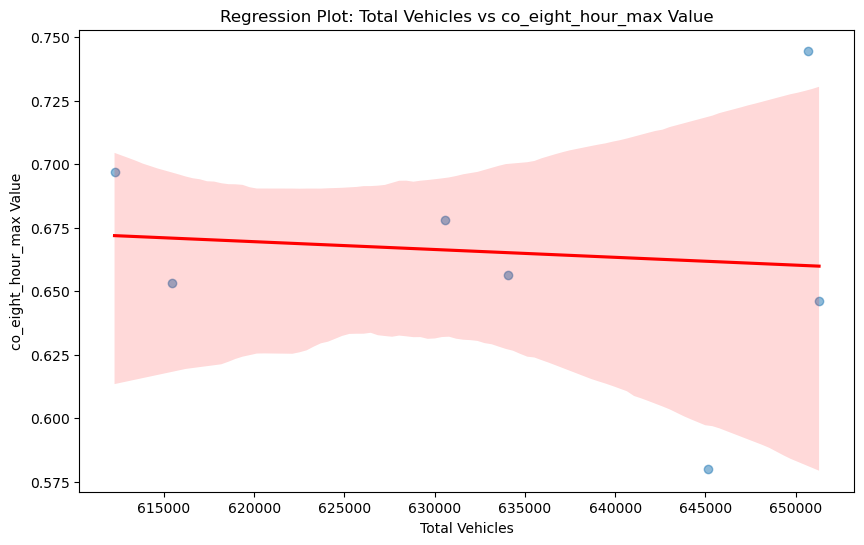

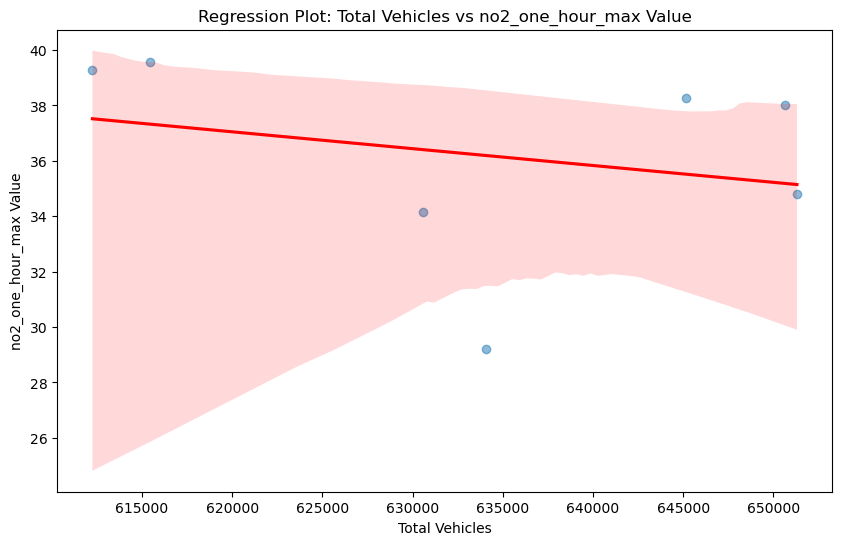

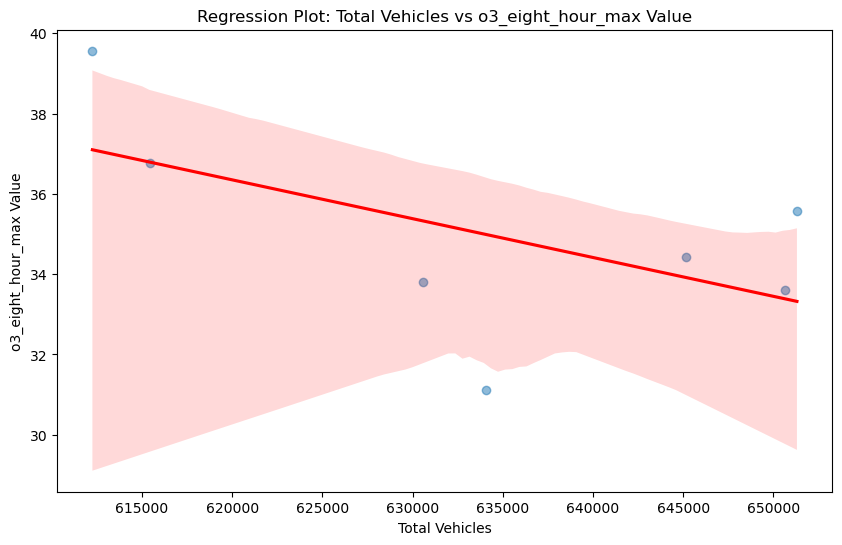

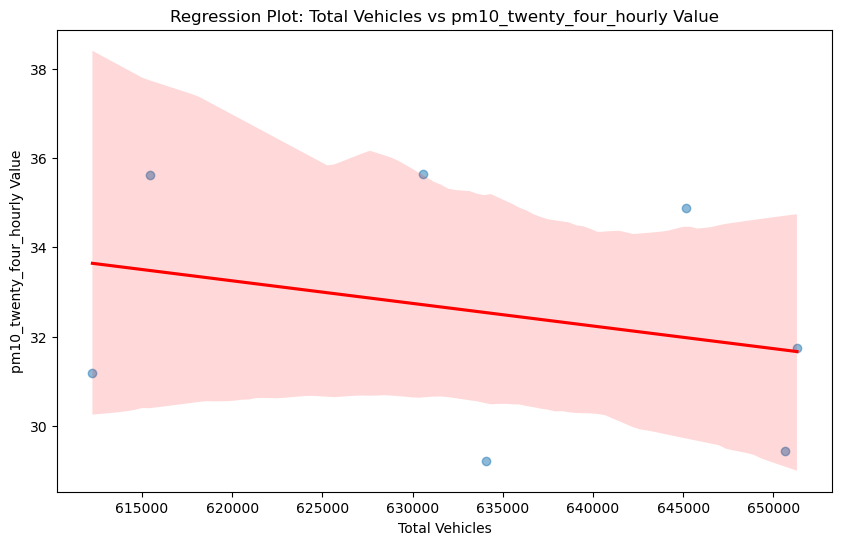

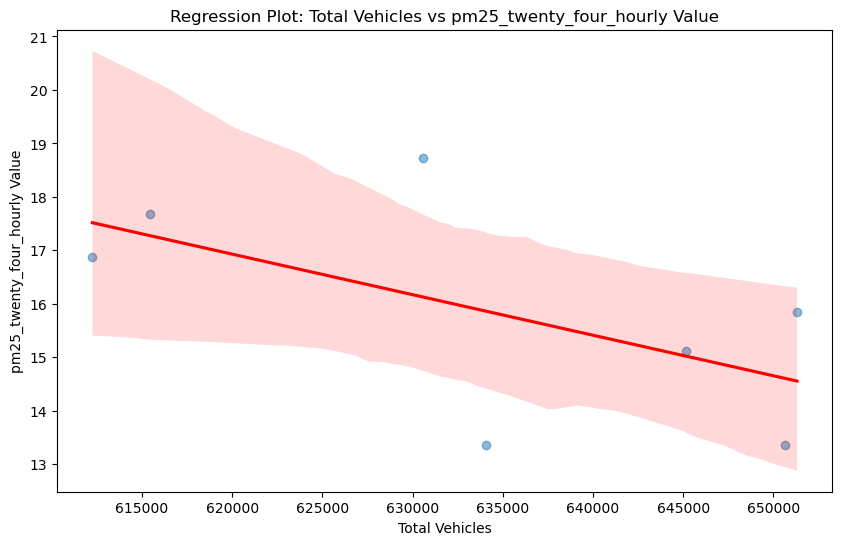

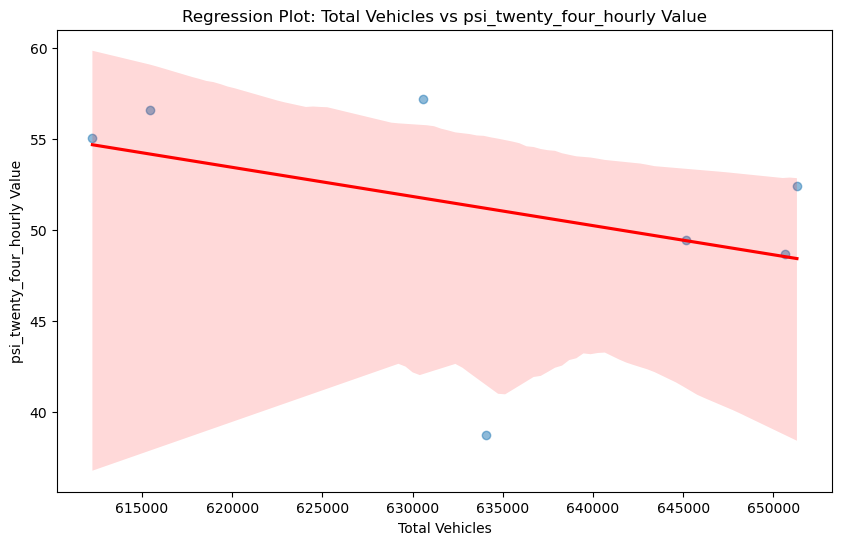

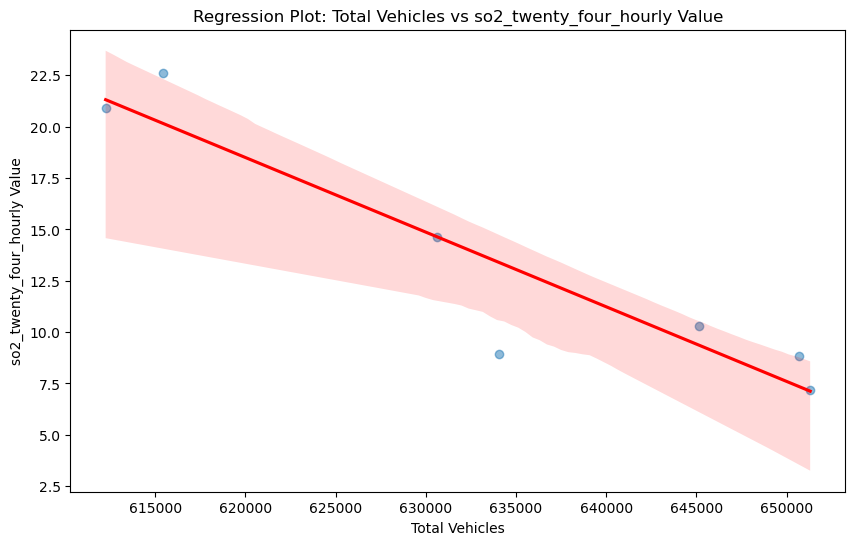

In [82]:
# 分别为每个污染物绘制 total_vehicles 对 value 的回归拟合图
for pollutant in pollutants:
    plt.figure(figsize=(10, 6))
    
    # 筛选出当前污染物的数据
    pollutant_data = merged_data[merged_data['pollutant'] == pollutant]
    
    # 绘制 total_vehicles 对 value 的回归拟合图
    sns.regplot(x='total_vehicles', y='value', data=pollutant_data, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
    plt.title(f'Regression Plot: Total Vehicles vs {pollutant} Value')
    plt.xlabel('Total Vehicles')
    plt.ylabel(f'{pollutant} Value')
    plt.show()

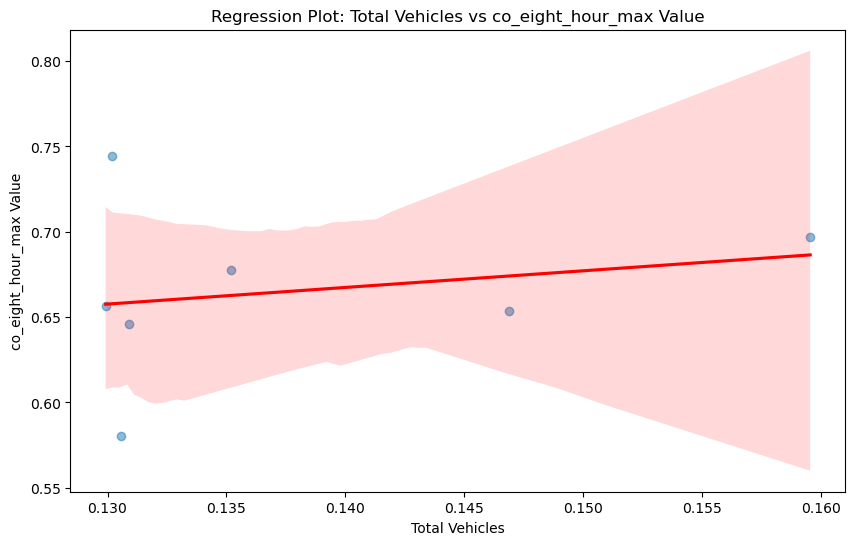

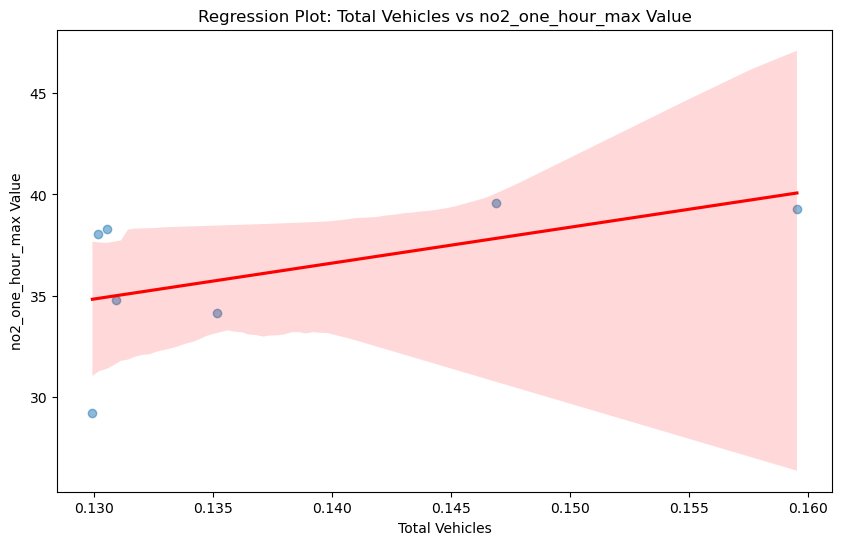

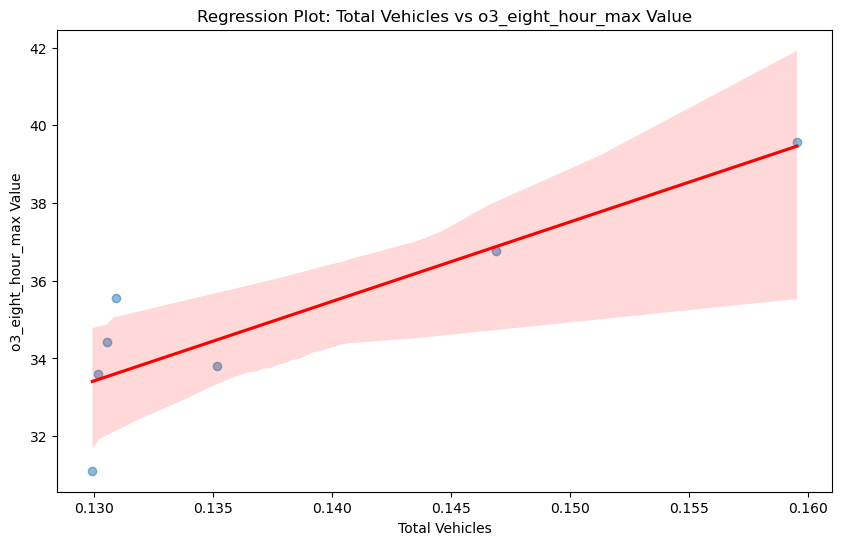

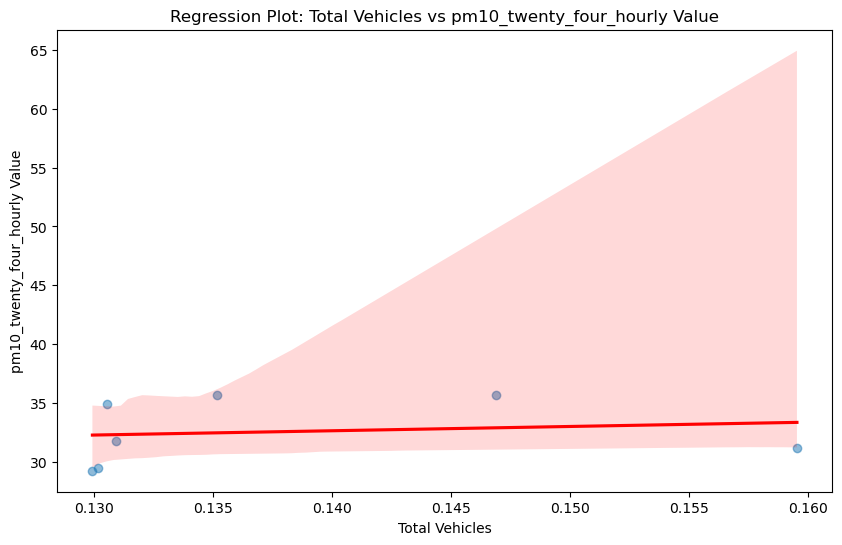

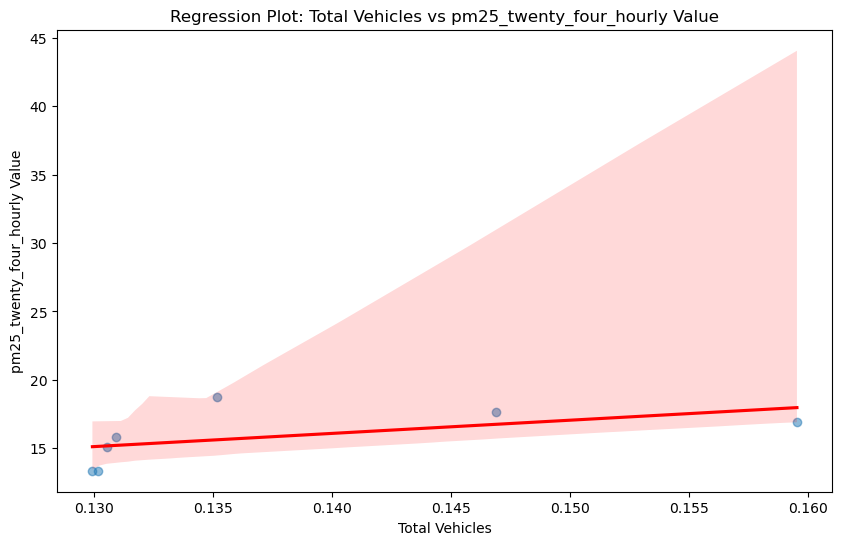

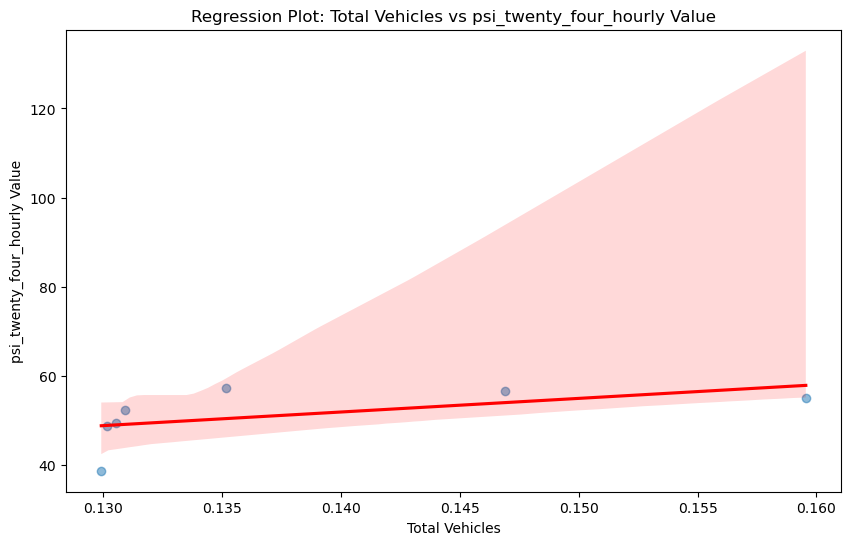

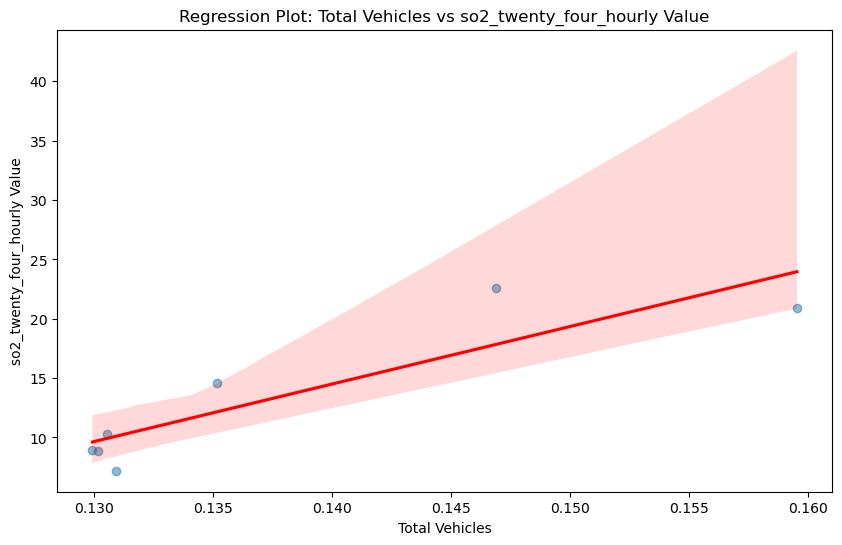

In [83]:
# 分别为每个污染物绘制 total_vehicles 对 value 的回归拟合图
for pollutant in pollutants:
    plt.figure(figsize=(10, 6))
    
    # 筛选出当前污染物的数据
    pollutant_data = merged_data[merged_data['pollutant'] == pollutant]
    
    # 绘制 total_vehicles 对 value 的回归拟合图
    sns.regplot(x='large_vehicle_ratio', y='value', data=pollutant_data, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
    plt.title(f'Regression Plot: Total Vehicles vs {pollutant} Value')
    plt.xlabel('Total Vehicles')
    plt.ylabel(f'{pollutant} Value')
    plt.show()